### Connection

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='M@hmudul162',
    database='telco_churn'
)


In [6]:
df = pd.read_sql('SELECT * FROM telco_customer_churn', conn)  
df.head()

C:\Users\mahmu\AppData\Local\Temp\ipykernel_16316\1372867020.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM telco_customer_churn', conn)


,CustomerID,City,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,...,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239.0,Competitor made better offer\r
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701.0,Moved\r
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372.0,Moved\r
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003.0,Moved\r
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340.0,Competitor had better devices\r


#### Basic Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7042 non-null   object 
 1   City               7042 non-null   object 
 2   Gender             7042 non-null   object 
 3   Senior_Citizen     7042 non-null   object 
 4   Partner            7042 non-null   object 
 5   Dependents         7042 non-null   object 
 6   Tenure_Months      7042 non-null   int64  
 7   Phone_Service      7042 non-null   object 
 8   Multiple_Lines     7042 non-null   object 
 9   Internet_Service   7042 non-null   object 
 10  Online_Security    7042 non-null   object 
 11  Online_Backup      7042 non-null   object 
 12  Device_Protection  7042 non-null   object 
 13  Tech_Support       7042 non-null   object 
 14  Streaming_TV       7042 non-null   object 
 15  Streaming_Movies   7042 non-null   object 
 16  Contract           7042 

#### Duplicate Rows

In [8]:
print("Number of duplicate rows:", df['CustomerID'].duplicated().sum())

Number of duplicate rows: 0


#### Mapping necessary columns

In [9]:
# Map the Gender column
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [10]:
# Map Yes/No columns to 1/0
yes_no_columns = ['Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Paperless_Billing']

for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

#### Replace Values

In [11]:
cols_with_no_internet = ['Multiple_Lines', 'Online_Security', 'Online_Backup', 'Device_Protection', 
                         'Tech_Support', 'Streaming_TV', 'Streaming_Movies']
for col in cols_with_no_internet:
    df[col] = df[col].replace({'No internet service': 'No'})
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [12]:
df[['Multiple_Lines', 'Online_Security', 'Online_Backup', 'Device_Protection', 
                         'Tech_Support', 'Streaming_TV', 'Streaming_Movies']].head()

,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,0.0,1,1,0,0,0,0
1,0.0,0,0,0,0,0,0
2,1.0,0,0,1,0,1,1
3,1.0,0,0,1,1,1,1
4,1.0,0,1,1,0,1,1


#### Missing Values

In [13]:
df.isnull().sum()

CustomerID             0
City                   0
Gender                 0
Senior_Citizen         0
Partner                0
Dependents             0
Tenure_Months          0
Phone_Service          0
Multiple_Lines       682
Internet_Service       0
Online_Security        0
Online_Backup          0
Device_Protection      0
Tech_Support           0
Streaming_TV           0
Streaming_Movies       0
Contract               0
Paperless_Billing      0
Payment_Method         0
Monthly_Charge         0
Total_Charges          0
Churn_Value            0
Churn_Score            0
CLTV                   0
Churn_Reason           0
dtype: int64

In [14]:
df['Multiple_Lines'].value_counts()

Multiple_Lines
0.0    3389
1.0    2971
Name: count, dtype: int64

In [15]:
# Fill the null values with Mode
df['Multiple_Lines'] = df['Multiple_Lines'].fillna(df['Multiple_Lines'].mode()[0])

In [16]:
print(df['Multiple_Lines'].isnull().sum())

0


#### One-Hot Encoding 

In [17]:
# Convert other categorical columns like 'Internet_Service', 'Contract', 'Payment_Method', etc., using one-hot encoding
df = pd.get_dummies(df, columns=['Internet_Service', 'Contract', 'Payment_Method'])

In [18]:
df.dtypes

CustomerID                                   object
City                                         object
Gender                                        int64
Senior_Citizen                                int64
Partner                                       int64
Dependents                                    int64
Tenure_Months                                 int64
Phone_Service                                 int64
Multiple_Lines                              float64
Online_Security                               int64
Online_Backup                                 int64
Device_Protection                             int64
Tech_Support                                  int64
Streaming_TV                                  int64
Streaming_Movies                              int64
Paperless_Billing                             int64
Monthly_Charge                              float64
Total_Charges                               float64
Churn_Value                                   int64
Churn_Score 

#### Churn Reasons Identification

In [19]:
# Value counts for churn reasons
print(df['Churn_Reason'].value_counts())

Churn_Reason
\r                                             5173
Attitude of support person\r                    192
Competitor offered higher download speeds\r     189
Competitor offered more data\r                  162
Don't know\r                                    154
Competitor made better offer\r                  140
Attitude of service provider\r                  135
Competitor had better devices\r                 130
Network reliability\r                           103
Product dissatisfaction\r                       102
Price too high\r                                 98
Service dissatisfaction\r                        89
Lack of self-service on Website\r                88
Extra data charges\r                             57
Moved\r                                          53
Limited range of services\r                      44
Lack of affordable download/upload speed\r       44
Long distance charges\r                          44
Poor expertise of phone support\r                20

In [20]:
# Replace the \r
df['Churn_Reason'] = df['Churn_Reason'].str.strip().str.replace('\r', '', regex=False)

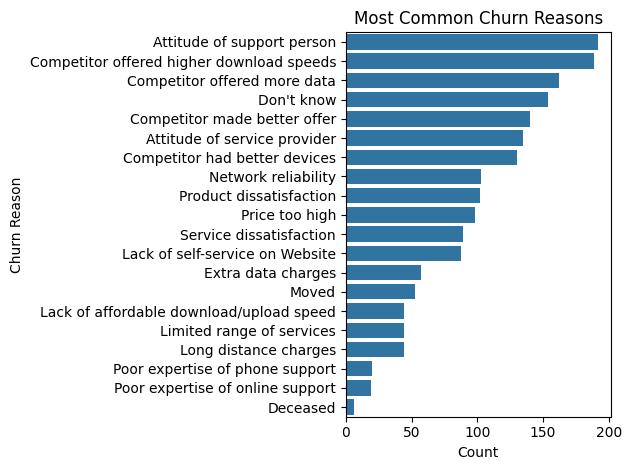

In [21]:
# Remove null values from 'Churn_Reason'
filtered_df = df[df['Churn_Reason'].notnull() & (df['Churn_Reason'].str.strip() != '')]

# Visualize the most common churn reasons
sns.countplot(y='Churn_Reason', data=filtered_df, order=filtered_df['Churn_Reason'].value_counts().index)
plt.title('Most Common Churn Reasons')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()

In [22]:
df.head()

,CustomerID,City,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Online_Security,...,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,3668-QPYBK,Los Angeles,1,0,0,0,2,1,0.0,1,...,True,False,False,True,False,False,False,False,False,True
1,9237-HQITU,Los Angeles,0,0,0,1,2,1,0.0,0,...,False,True,False,True,False,False,False,False,True,False
2,9305-CDSKC,Los Angeles,0,0,0,1,8,1,1.0,0,...,False,True,False,True,False,False,False,False,True,False
3,7892-POOKP,Los Angeles,0,0,1,1,28,1,1.0,0,...,False,True,False,True,False,False,False,False,True,False
4,0280-XJGEX,Los Angeles,1,0,0,1,49,1,1.0,0,...,False,True,False,True,False,False,True,False,False,False


#### Outlier Identification

In [23]:
def identify_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers


In [24]:
# Z-score
# Define function
def detect_outliers(data, threshold = 3 ):
    mean = np.mean(data)
    std = np.std(data)
    z_score = np.abs((data - mean)/ std)   # Z-score formula

    return z_score > threshold

In [25]:
# Tenure Months outliers identification
Tenure_Months_outliers = detect_outliers(df['Tenure_Months'])
print(Tenure_Months_outliers.sum())

0


In [26]:
# Monthly Charge outliers identification
Monthly_Charge_outliers = detect_outliers(df['Monthly_Charge'])
print(Monthly_Charge_outliers.sum())

0


In [27]:
# Total Charge outliers identification
Total_Charge_outliers = detect_outliers(df['Total_Charges'])
print(Total_Charge_outliers.sum())

0


In [28]:
# Churn Score outliers identification
Churn_Score_outliers = detect_outliers(df['Churn_Score'])
print(Churn_Score_outliers.sum())

0


#### Correlation Heatmap

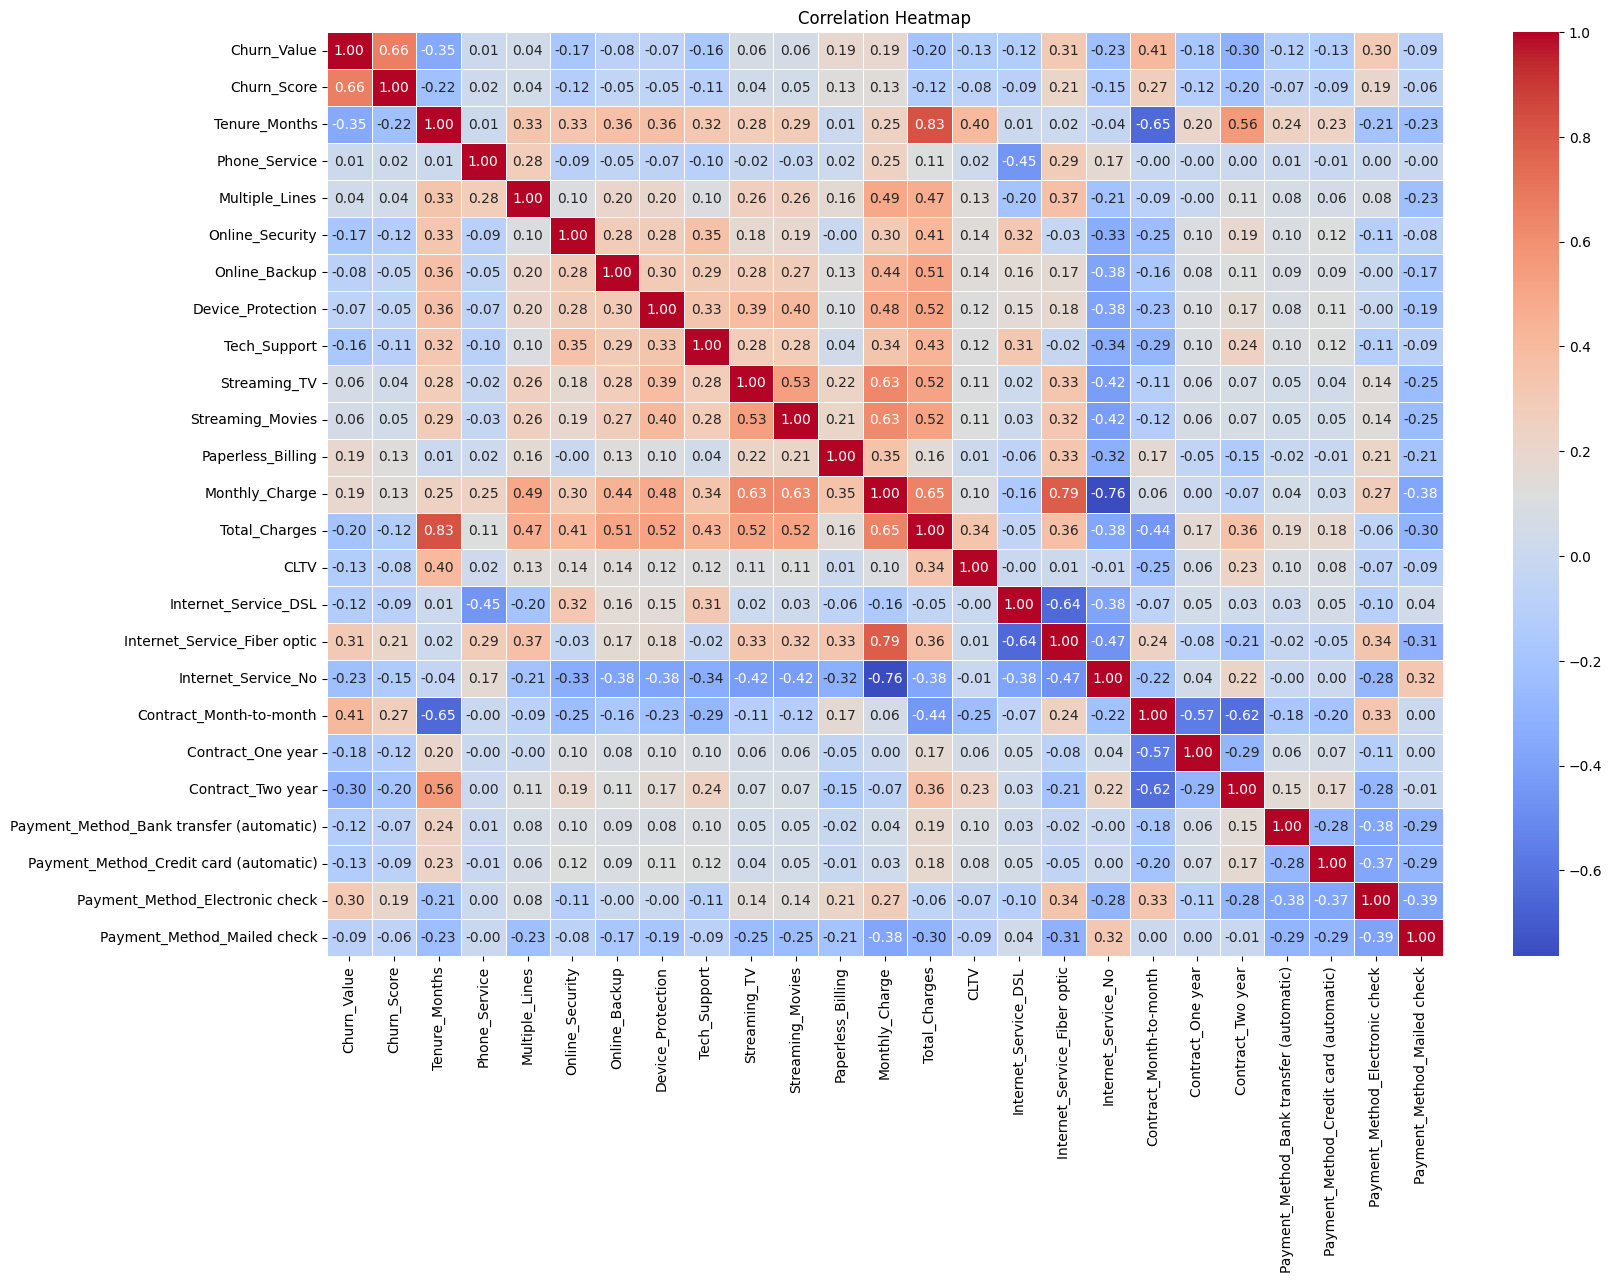

In [29]:
# Specified DataFrame
df = df[
    [
        'Churn_Value', 'Churn_Score', 'Tenure_Months', 'Phone_Service', 
        'Multiple_Lines', 'Online_Security', 'Online_Backup', 
        'Device_Protection', 'Tech_Support', 'Streaming_TV', 
        'Streaming_Movies', 'Paperless_Billing', 'Monthly_Charge', 
        'Total_Charges', 'CLTV', 
        'Internet_Service_DSL', 'Internet_Service_Fiber optic', 
        'Internet_Service_No', 'Contract_Month-to-month', 
        'Contract_One year', 'Contract_Two year', 
        'Payment_Method_Bank transfer (automatic)', 
        'Payment_Method_Credit card (automatic)', 
        'Payment_Method_Electronic check', 
        'Payment_Method_Mailed check'
    ]
]

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.head()

,Churn_Value,Churn_Score,Tenure_Months,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,...,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,1,86,2,1,0.0,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
1,1,67,2,1,0.0,0,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
2,1,86,8,1,1.0,0,0,1,0,1,...,False,True,False,True,False,False,False,False,True,False
3,1,84,28,1,1.0,0,0,1,1,1,...,False,True,False,True,False,False,False,False,True,False
4,1,89,49,1,1.0,0,1,1,0,1,...,False,True,False,True,False,False,True,False,False,False


### Model Building and Evaluation (Machine Learning with Python)

#### Select Feature & Target

In [31]:
# Define the target
target = 'Churn_Value'

# Choose the features
features = [
    'Churn_Score', 'Tenure_Months', 'Phone_Service', 
    'Multiple_Lines', 'Online_Security', 'Online_Backup', 
    'Device_Protection', 'Tech_Support', 'Streaming_TV', 
    'Streaming_Movies', 'Paperless_Billing', 'Monthly_Charge', 
    'Total_Charges', 'CLTV', 
    'Internet_Service_DSL', 'Internet_Service_Fiber optic', 
    'Contract_Month-to-month', 'Contract_One year', 
    'Payment_Method_Bank transfer (automatic)', 
    'Payment_Method_Credit card (automatic)', 
    'Payment_Method_Electronic check'
]

X = df[features]
y = df[target]

#### Test-Train Split

In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the train model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

# Prediction 
y_pred_log = log_model.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1035
           1       0.87      0.85      0.86       374

    accuracy                           0.93      1409
   macro avg       0.91      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409



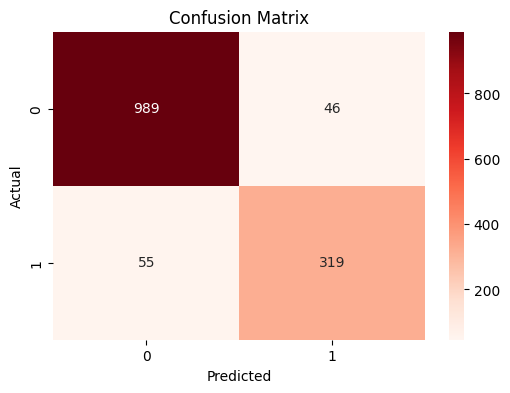

In [34]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1035
           1       0.89      0.86      0.87       374

    accuracy                           0.93      1409
   macro avg       0.92      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409



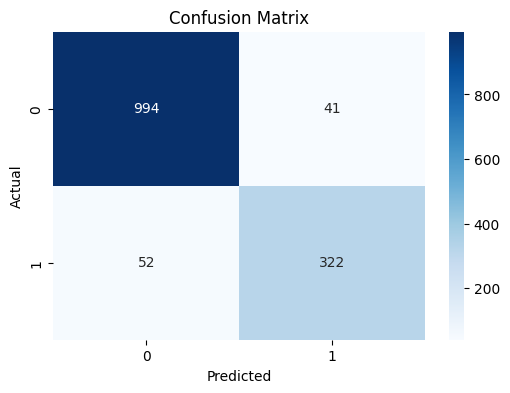

In [36]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True,  fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### XGBoost Model

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1035
           1       0.89      0.86      0.88       374

    accuracy                           0.94      1409
   macro avg       0.92      0.91      0.92      1409
weighted avg       0.93      0.94      0.94      1409



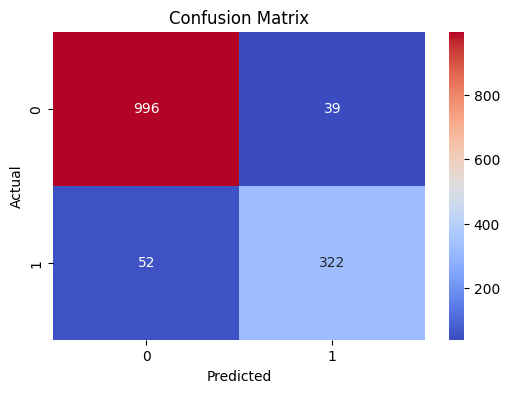

In [38]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True,  fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### SVM Model

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM model
model_svm = SVC(kernel='linear', C=1.0, gamma='scale', class_weight='balanced')

# Fit the model on training data
model_svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = model_svm.predict(X_test)

# Print evaluation metrics
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1035
           1       0.78      0.94      0.85       374

    accuracy                           0.91      1409
   macro avg       0.88      0.92      0.89      1409
weighted avg       0.92      0.91      0.92      1409



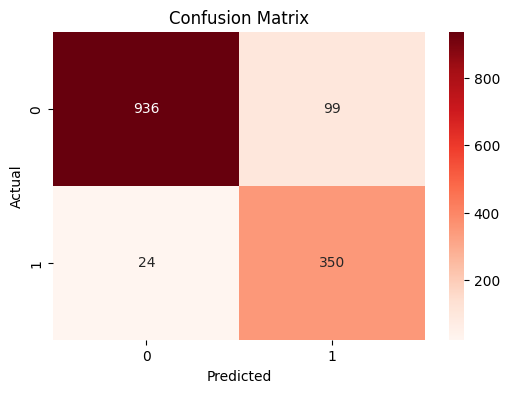

In [40]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### KNN Model

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline
pipeline_knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluate
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1035
           1       0.78      0.76      0.77       374

    accuracy                           0.88      1409
   macro avg       0.85      0.84      0.84      1409
weighted avg       0.88      0.88      0.88      1409



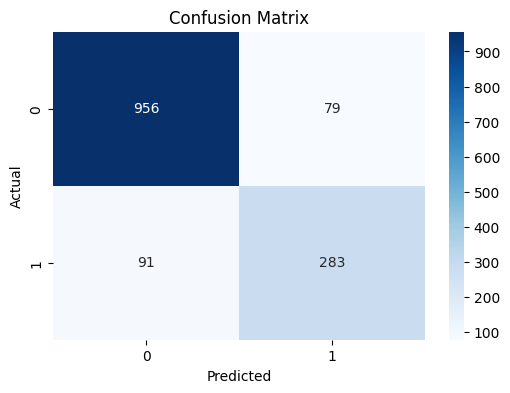

In [42]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True,  fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### LightGBM Model

In [43]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_test)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm, zero_division=0))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 5633, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265400 -> initscore=-1.018086
[LightGBM] [Info] Start training from score -1.018086
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1035
           1       0.89      0.88      0.88       374

    accuracy                           0.94      1409
   macro avg       0.92      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409



#### CatBoost Model

In [46]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0)
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat, zero_division=0))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1035
           1       0.89      0.87      0.88       374

    accuracy                           0.94      1409
   macro avg       0.92      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409



#### Model Comparison

In [54]:
from sklearn.metrics import accuracy_score

# Create a dictionary to store the results
model_scores = {}

# XGBoost
model_scores['XGBoost'] = accuracy_score(y_test, y_pred_xgb)

# LightGBM
model_scores['LightGBM'] = accuracy_score(y_test, y_pred_lgbm)

# CatBoost
model_scores['CatBoost'] = accuracy_score(y_test, y_pred_cat)

# Random Forest
model_scores['Random Forest'] = accuracy_score(y_test, y_pred_rf)


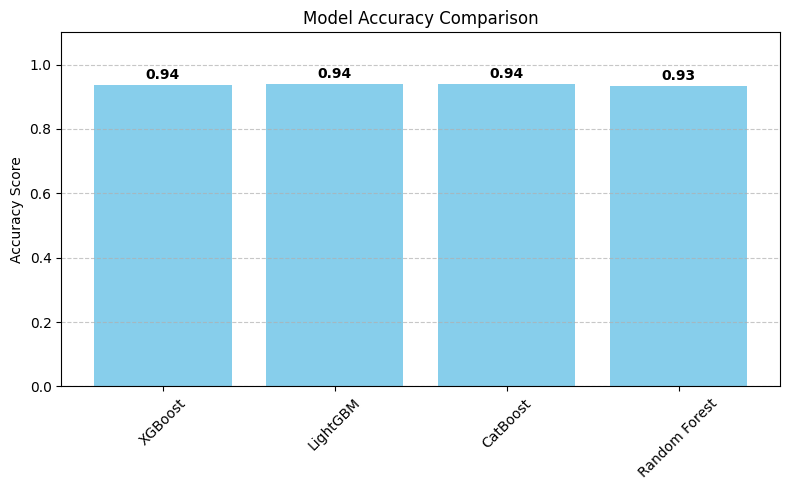

In [51]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,  # slight space above the bar
        f'{yval:.2f}',  # format the float to 2 decimals
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)  # slightly higher than 1 to fit labels
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Precision, Recall, and F1-score Comparison of Models

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize dictionaries
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Define models and predictions
models = {
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgbm,
    'CatBoost': y_pred_cat
}

# Loop through models and calculate metrics
for model_name, y_pred in models.items():
    precision_scores[model_name] = precision_score(y_test, y_pred, zero_division=0)
    recall_scores[model_name] = recall_score(y_test, y_pred, zero_division=0)
    f1_scores[model_name] = f1_score(y_test, y_pred, zero_division=0)


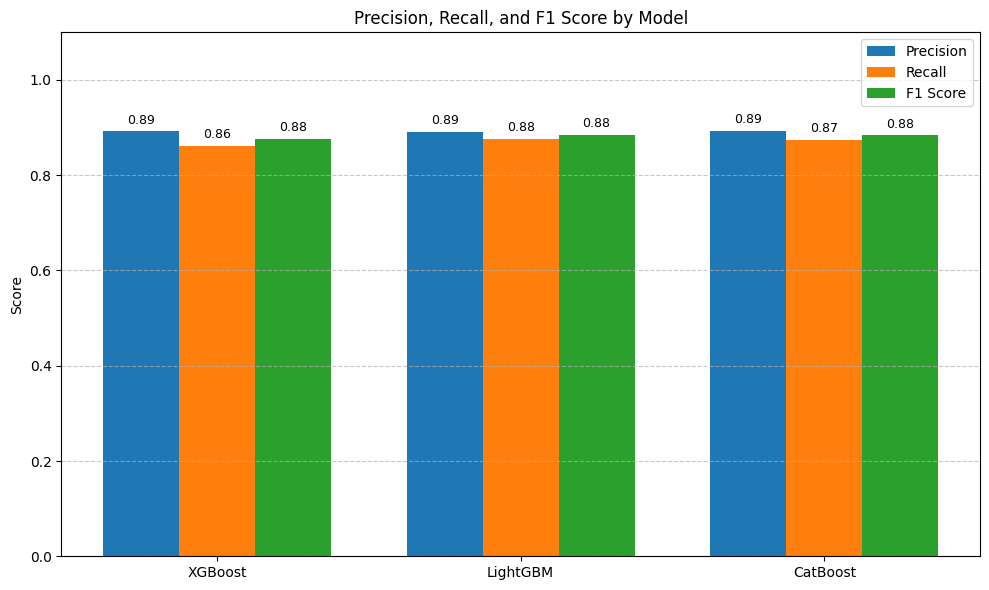

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Set model names and index
labels = list(models.keys())
x = np.arange(len(labels))  # label locations
width = 0.25  # bar width

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision_scores.values(), width, label='Precision')
bars2 = ax.bar(x, recall_scores.values(), width, label='Recall')
bars3 = ax.bar(x + width, f1_scores.values(), width, label='F1 Score')

# Add labels above bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Final touches
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


While XGBoost, CatBoost, and LightGBM achieved similar accuracy and precision, LightGBM outperformed the others in recall. This indicates it was better at detecting customers likely to churn, which is crucial in churn prediction scenarios where missing a churner is more costly than falsely predicting one.

#### Tune LightBGM Model

##### Check Class Imbalance

In [55]:
model_lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

##### Define a Parameter Grid for Tuning

In [56]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]  # Helps with class imbalance
}

##### Run RandomizedSearchCV for Efficiency

In [65]:
lgbm = LGBMClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',  
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 5633, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265400 -> initscore=-1.018086
[LightGBM] [Info] Start training from score -1.018086


##### Evaluate The Model

In [66]:
from sklearn.metrics import classification_report

y_pred_best = best_model.predict(X_test)
print("Tuned LightGBM Classification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Tuned LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1035
           1       0.90      0.87      0.89       374

    accuracy                           0.94      1409
   macro avg       0.93      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409



#### Fine-tune threshold

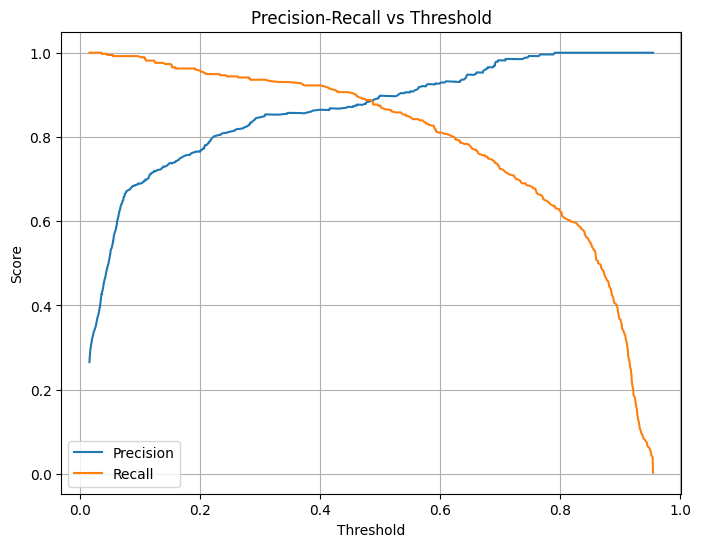

In [67]:
from sklearn.metrics import precision_recall_curve

# Step 1: Get predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:, 1]

# Step 2: Calculate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Step 3: Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Choose a custom threshold (example: 0.35)
custom_threshold = 0.35
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Classification report with new threshold
print("Classification Report at Threshold =", custom_threshold)
print(classification_report(y_test, y_pred_custom, zero_division=0))

Classification Report at Threshold = 0.35
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1035
           1       0.86      0.93      0.89       374

    accuracy                           0.94      1409
   macro avg       0.91      0.94      0.92      1409
weighted avg       0.94      0.94      0.94      1409



C:\Users\mahmu\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


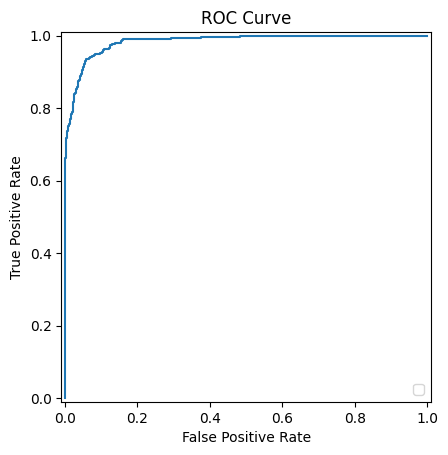

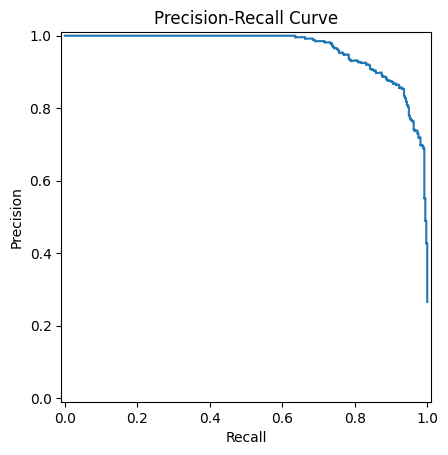

In [69]:
from sklearn.metrics import roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_probs)
PrecisionRecallDisplay(precision=prec, recall=rec).plot()
plt.title('Precision-Recall Curve')
plt.show()

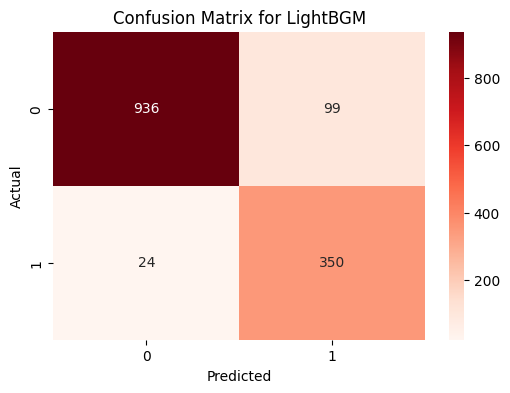

In [70]:
# Confusion Matrix
cm_lbgm = confusion_matrix(y_test, y_pred_custom)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LightBGM")
plt.show()

#### Save the Model

In [72]:
model_lgb_tuned = best_model

In [73]:
import joblib
joblib.dump(model_lgb_tuned, 'lightgbm_churn_model.pkl')

['lightgbm_churn_model.pkl']

#### 📝 Final Summary and Conclusion

#### 🔍 Key Observations:

#### ✅ Final Decision: